Simple Linear Regression

Slope (coefficient): 2.47
Intercept: 1.51
R² Score: 0.993


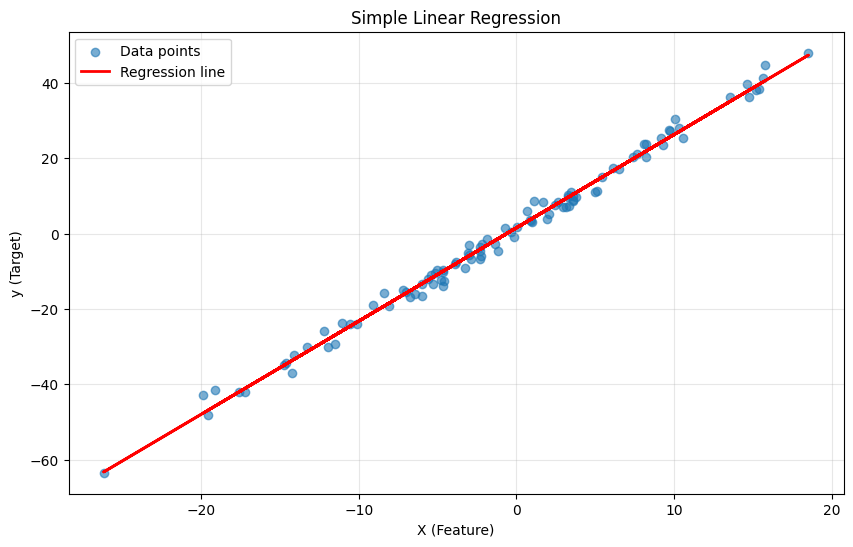

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
np.random.seed(42)
X = np.random.randn(100, 1) * 10  # Feature
y = 2.5 * X.ravel() + 1.5 + np.random.randn(100) * 2  # Target with noise

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Display results
print(f"Slope (coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score: {r2_score(y, y_pred):.3f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Multiple Linear Regression

Multiple Linear Regression Results:
Coefficients: [99.08185564 80.40711429 25.03096202]
Intercept: 1.44
Training R² Score: 0.994
Test R² Score: 0.994


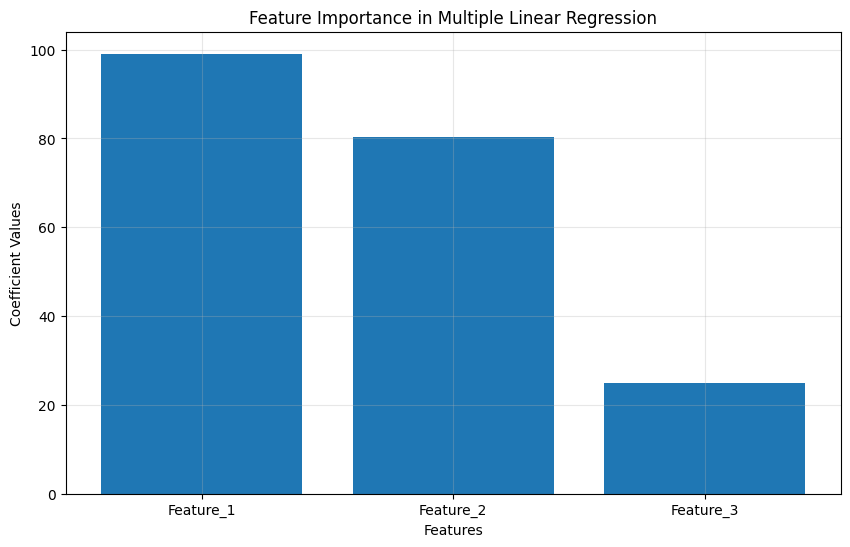

In [2]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate sample data with multiple features
X, y = make_regression(n_samples=1000, n_features=3, noise=10, random_state=42)
feature_names = ['Feature_1', 'Feature_2', 'Feature_3']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Display results
print("Multiple Linear Regression Results:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Training R² Score: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test R² Score: {r2_score(y_test, y_test_pred):.3f}")

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.bar(feature_names, model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Feature Importance in Multiple Linear Regression')
plt.grid(True, alpha=0.3)
plt.show()

 Manual Implementation of Least Squares

Manual calculation - Slope: 2.082, Intercept: -0.145
Sklearn calculation - Slope: 2.082, Intercept: -0.145


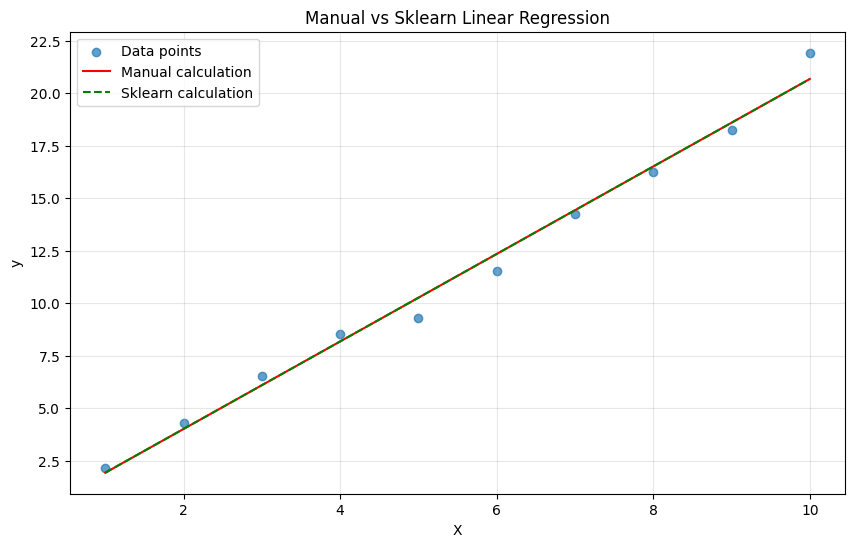

In [3]:
def least_squares_regression(X, y):
    """
    Manual implementation of least squares regression
    """
    n = len(X)

    # Calculate means
    x_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculate slope (m) and intercept (b)
    numerator = np.sum((X - x_mean) * (y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)

    m = numerator / denominator
    b = y_mean - m * x_mean

    return m, b

# Example usage
X_simple = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_simple = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) + np.random.randn(10) * 0.5

# Manual calculation
m_manual, b_manual = least_squares_regression(X_simple, y_simple)
print(f"Manual calculation - Slope: {m_manual:.3f}, Intercept: {b_manual:.3f}")

# Using sklearn for comparison
model_sklearn = LinearRegression()
model_sklearn.fit(X_simple.reshape(-1, 1), y_simple)
print(f"Sklearn calculation - Slope: {model_sklearn.coef_[0]:.3f}, Intercept: {model_sklearn.intercept_:.3f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.7, label='Data points')
plt.plot(X_simple, m_manual * X_simple + b_manual, 'r-', label='Manual calculation')
plt.plot(X_simple, model_sklearn.predict(X_simple.reshape(-1, 1)), 'g--', label='Sklearn calculation')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Manual vs Sklearn Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Matrix Implementation

In [4]:
def matrix_linear_regression(X, y):
    """
    Matrix implementation of linear regression using normal equation
    """
    # Add bias column (intercept)
    X_with_bias = np.column_stack([np.ones(len(X)), X])

    # Calculate coefficients using normal equation
    # β = (X^T X)^(-1) X^T y
    XtX = np.dot(X_with_bias.T, X_with_bias)
    XtX_inv = np.linalg.inv(XtX)
    Xty = np.dot(X_with_bias.T, y)
    coefficients = np.dot(XtX_inv, Xty)

    return coefficients

# Example with multiple features
X_multi = np.random.randn(100, 3)
true_coefficients = np.array([2, -1.5, 0.8, 3])  # [intercept, coef1, coef2, coef3]
y_multi = np.column_stack([np.ones(100), X_multi]).dot(true_coefficients) + np.random.randn(100) * 0.5

# Matrix implementation
coefficients_matrix = matrix_linear_regression(X_multi, y_multi)
print("Matrix Implementation Coefficients:")
print(f"Intercept: {coefficients_matrix[0]:.3f}")
print(f"Coefficients: {coefficients_matrix[1:]}")

# Sklearn comparison
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)
print("\nSklearn Coefficients:")
print(f"Intercept: {model_multi.intercept_:.3f}")
print(f"Coefficients: {model_multi.coef_}")

Matrix Implementation Coefficients:
Intercept: 1.963
Coefficients: [-1.5317961   0.83147586  3.01793244]

Sklearn Coefficients:
Intercept: 1.963
Coefficients: [-1.5317961   0.83147586  3.01793244]


**Practical Implementation with Use Cases**

Use Case 1: Predicting Sales Based on Advertising Spend

Advertising Dataset Info:
                TV        Radio    Newspaper        Sales
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    147.076966    25.350865    50.240573    62.949296
std      87.641209    14.609495    29.067420    11.167715
min       1.389607     0.160913     0.001163    23.964327
25%      70.791980    12.053714    26.135098    55.215106
50%     149.042213    25.936695    50.061392    63.246011
75%     223.295876    38.023253    75.910353    70.322301
max     299.915302    49.970686    99.782086    99.957902

Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.029310   0.014518  0.368043
Radio      0.029310  1.000000   0.027262  0.245842
Newspaper  0.014518  0.027262   1.000000  0.062325
Sales      0.368043  0.245842   0.062325  1.000000


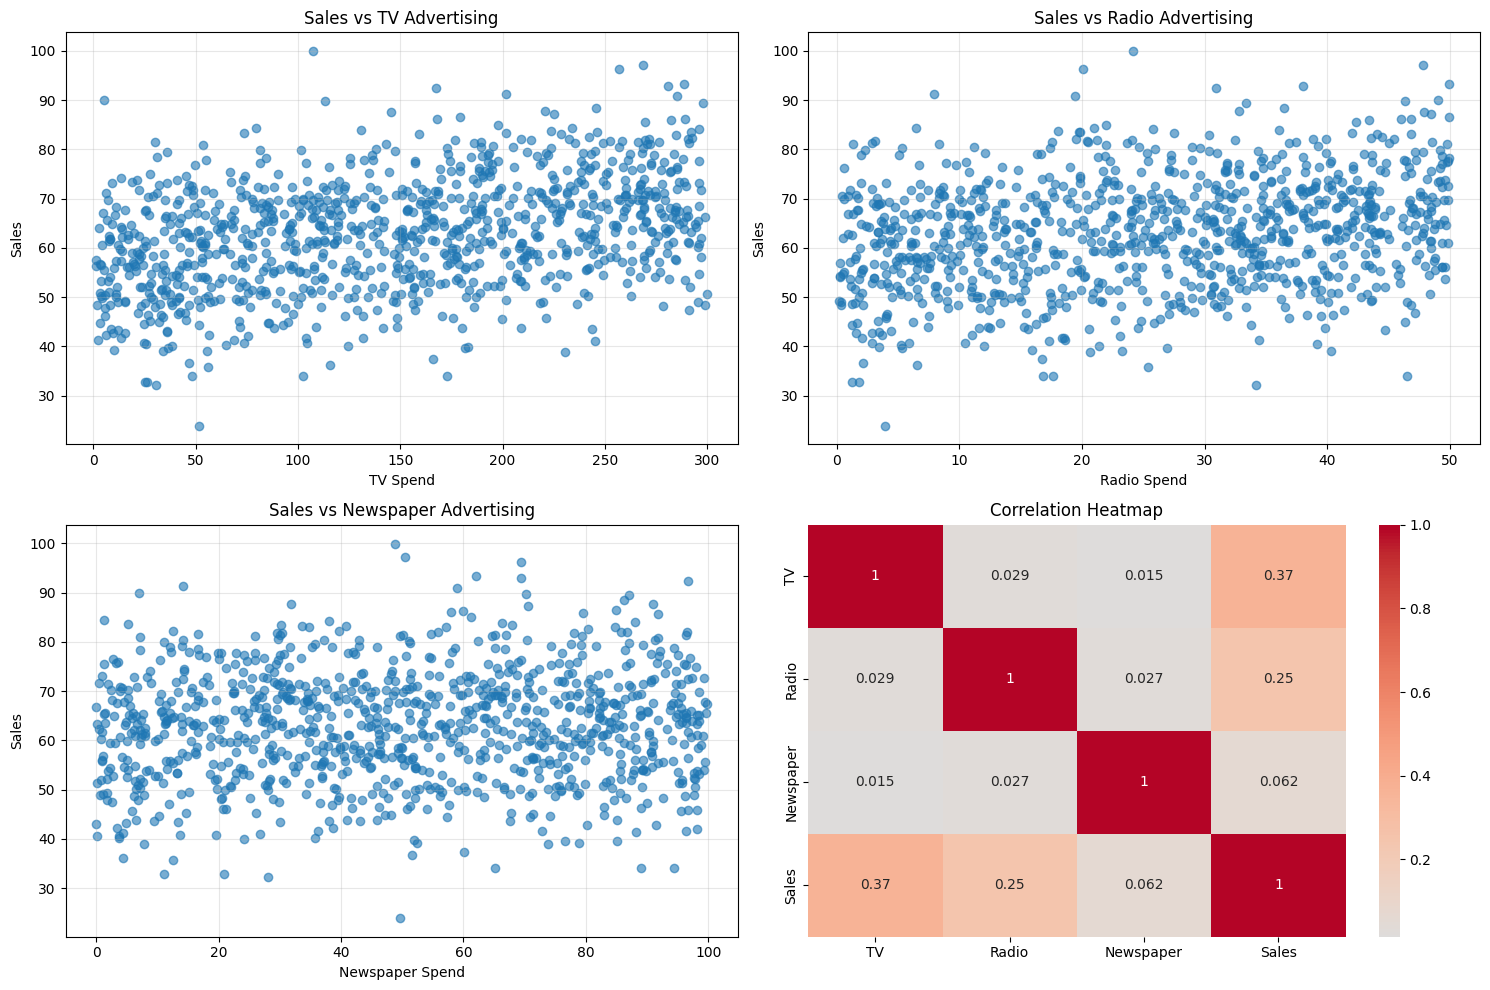


Model Performance:
R² Score: 0.211
RMSE: 10.54

Model Coefficients:
TV: 0.047
Radio: 0.147
Newspaper: 0.012
Intercept: 51.889


In [5]:
# Create synthetic advertising data
np.random.seed(42)
n_samples = 1000

# Features: TV, Radio, Newspaper advertising spend
tv_spend = np.random.uniform(0, 300, n_samples)
radio_spend = np.random.uniform(0, 50, n_samples)
newspaper_spend = np.random.uniform(0, 100, n_samples)

# Target: Sales (with realistic relationship)
sales = (0.05 * tv_spend + 0.2 * radio_spend + 0.01 * newspaper_spend +
         50 + np.random.normal(0, 10, n_samples))

# Create DataFrame
advertising_data = pd.DataFrame({
    'TV': tv_spend,
    'Radio': radio_spend,
    'Newspaper': newspaper_spend,
    'Sales': sales
})

print("Advertising Dataset Info:")
print(advertising_data.describe())

# Correlation analysis
correlation_matrix = advertising_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Individual feature vs sales plots
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(advertising_data[feature], advertising_data['Sales'], alpha=0.6)
    axes[row, col].set_xlabel(f'{feature} Spend')
    axes[row, col].set_ylabel('Sales')
    axes[row, col].set_title(f'Sales vs {feature} Advertising')
    axes[row, col].grid(True, alpha=0.3)

# Correlation heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Build and evaluate model
X = advertising_data[['TV', 'Radio', 'Newspaper']]
y = advertising_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

print(f"\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

Use Case 2: Employee Salary Prediction

In [6]:
# Create synthetic employee data
np.random.seed(42)
n_employees = 500

# Features
years_experience = np.random.exponential(5, n_employees)
education_level = np.random.choice([1, 2, 3, 4], n_employees, p=[0.1, 0.3, 0.4, 0.2])  # 1=HS, 2=Bachelor, 3=Master, 4=PhD
performance_rating = np.random.normal(3.5, 0.5, n_employees)
performance_rating = np.clip(performance_rating, 1, 5)

# Target: Salary (with realistic relationship)
base_salary = 30000
salary = (base_salary +
          years_experience * 3000 +
          education_level * 8000 +
          performance_rating * 5000 +
          np.random.normal(0, 5000, n_employees))

# Create DataFrame
employee_data = pd.DataFrame({
    'Years_Experience': years_experience,
    'Education_Level': education_level,
    'Performance_Rating': performance_rating,
    'Salary': salary
})

print("Employee Dataset Info:")
print(employee_data.describe())

# Model building
X = employee_data[['Years_Experience', 'Education_Level', 'Performance_Rating']]
y = employee_data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"\nSalary Prediction Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nFeature Importance:")
print(feature_importance)

# Prediction example
sample_employee = np.array([[5, 3, 4.2]])  # 5 years exp, Master's, 4.2 rating
predicted_salary = model.predict(sample_employee)[0]
print(f"\nPredicted salary for sample employee: ${predicted_salary:,.2f}")

Employee Dataset Info:
       Years_Experience  Education_Level  Performance_Rating         Salary
count        500.000000       500.000000          500.000000     500.000000
mean           5.021546         2.672000            3.558423   84637.478816
std            4.870106         0.875184            0.491988   17300.519726
min            0.025372         1.000000            2.051872   53033.437429
25%            1.380615         2.000000            3.222366   72672.086272
50%            3.599149         3.000000            3.563420   81824.422657
75%            7.055537         3.000000            3.868022   93097.646093
max           24.784143         4.000000            4.789855  142057.734331

Salary Prediction Model Performance:
R² Score: 0.919
RMSE: $4,972.10

Feature Importance:
              Feature  Coefficient  Abs_Coefficient
1     Education_Level  8073.183822      8073.183822
2  Performance_Rating  4673.052608      4673.052608
0    Years_Experience  3051.970829      3051.9

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Performance Evaluation**

Residual Analysis

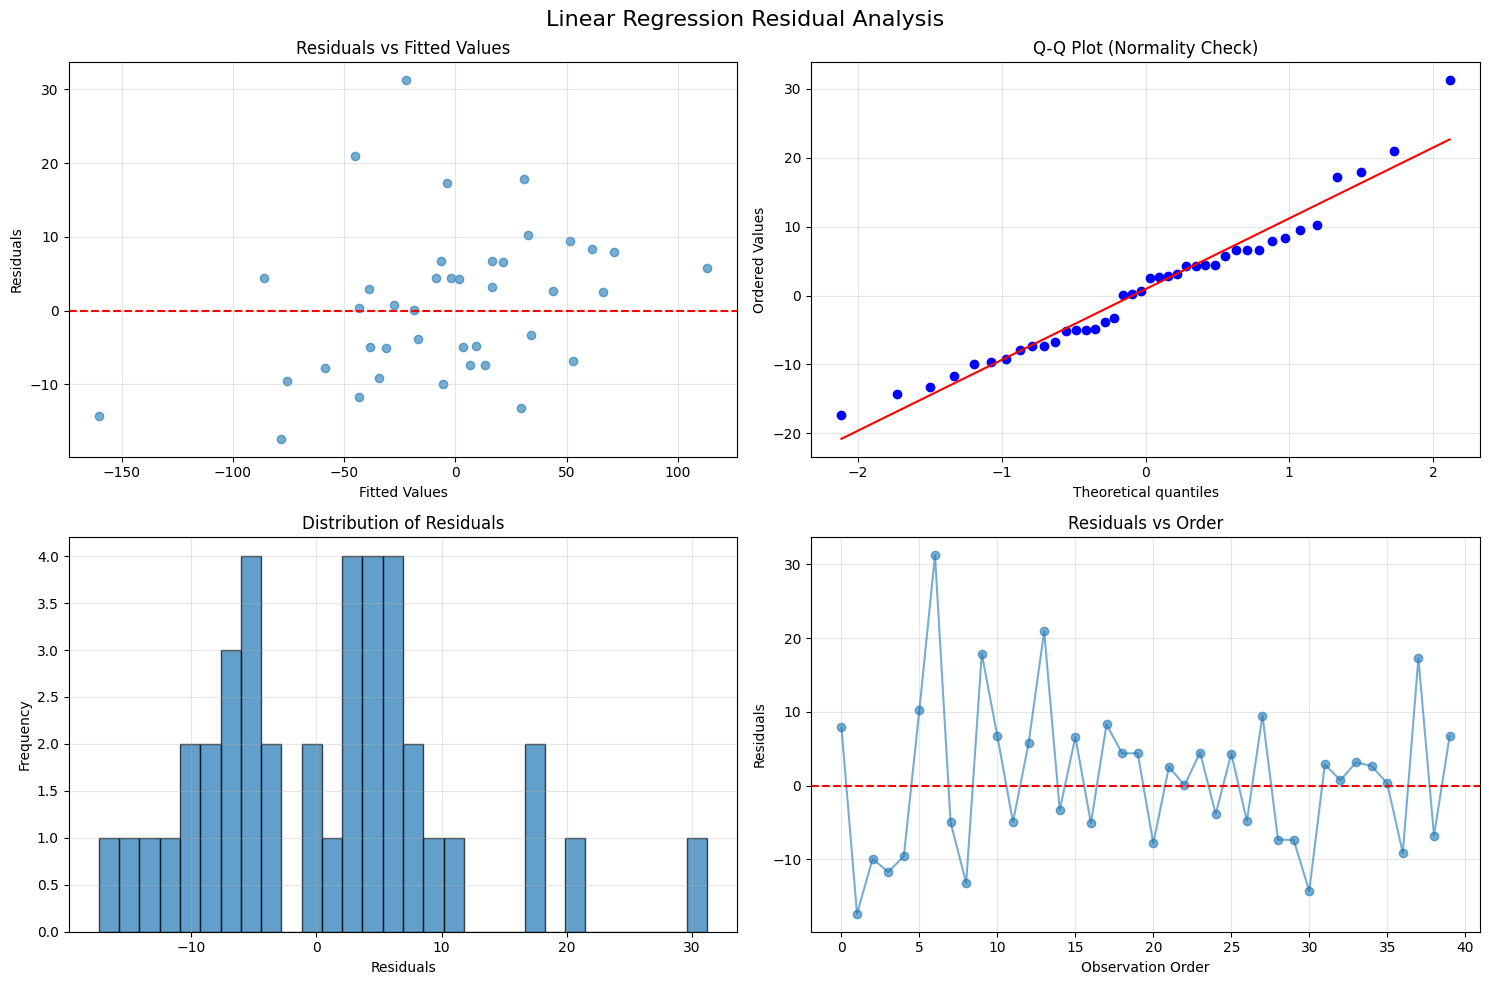

Residual Analysis Results:
Mean of residuals: 0.925925
Standard deviation of residuals: 10.039696
Shapiro-Wilk test p-value: 0.195444
✓ Residuals appear to be normally distributed


In [7]:
def residual_analysis(y_true, y_pred, title="Residual Analysis"):
    """
    Comprehensive residual analysis
    """
    residuals = y_true - y_pred

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Residuals vs Fitted Values
    axes[0, 0].scatter(y_pred, residuals, alpha=0.6)
    axes[0, 0].axhline(y=0, color='red', linestyle='--')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted Values')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Q-Q Plot (Normal distribution check)
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot (Normality Check)')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Histogram of Residuals
    axes[1, 0].hist(residuals, bins=30, alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Residuals')
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Residuals vs Order (Independence check)
    axes[1, 1].plot(residuals, 'o-', alpha=0.6)
    axes[1, 1].axhline(y=0, color='red', linestyle='--')
    axes[1, 1].set_xlabel('Observation Order')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].set_title('Residuals vs Order')
    axes[1, 1].grid(True, alpha=0.3)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    # Statistical tests
    print("Residual Analysis Results:")
    print(f"Mean of residuals: {np.mean(residuals):.6f}")
    print(f"Standard deviation of residuals: {np.std(residuals):.6f}")

    # Shapiro-Wilk test for normality
    _, p_value = stats.shapiro(residuals)
    print(f"Shapiro-Wilk test p-value: {p_value:.6f}")
    if p_value > 0.05:
        print("✓ Residuals appear to be normally distributed")
    else:
        print("✗ Residuals may not be normally distributed")

    return residuals

# Example usage
X, y = make_regression(n_samples=200, n_features=2, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

residuals = residual_analysis(y_test, y_pred, "Linear Regression Residual Analysis")

**Evaluation Metrics**

1. Mean Squared Error (MSE)

In [8]:
def mean_squared_error_manual(y_true, y_pred):
    """
    Manual implementation of MSE
    """
    return np.mean((y_true - y_pred) ** 2)

# MSE measures average squared differences
mse = mean_squared_error_manual(y_test, y_pred)
print(f"MSE: {mse:.3f}")

MSE: 101.653


2. Root Mean Squared Error (RMSE)

In [9]:
def root_mean_squared_error(y_true, y_pred):
    """
    Manual implementation of RMSE
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# RMSE is in the same units as the target variable
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.3f}")

RMSE: 10.082


3. Mean Absolute Error (MAE)

In [10]:
def mean_absolute_error_manual(y_true, y_pred):
    """
    Manual implementation of MAE
    """
    return np.mean(np.abs(y_true - y_pred))

# MAE is less sensitive to outliers than MSE
mae = mean_absolute_error_manual(y_test, y_pred)
print(f"MAE: {mae:.3f}")

MAE: 8.010


4. Coefficient of Determination (R²)

In [11]:
def r2_score_manual(y_true, y_pred):
    """
    Manual implementation of R²
    """
    ss_res = np.sum((y_true - y_pred) ** 2)  # Sum of squares of residuals
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)

# R² measures proportion of variance explained by the model
r2 = r2_score_manual(y_test, y_pred)
print(f"R²: {r2:.3f}")

R²: 0.965


**Comprehensive Evaluation Function**

In [12]:
def comprehensive_evaluation(y_true, y_pred, model_name="Model"):
    """
    Comprehensive model evaluation with all metrics
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Additional metrics
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error

    # Create results DataFrame
    results = pd.DataFrame({
        'Metric': ['MSE', 'RMSE', 'MAE', 'R²', 'MAPE (%)'],
        'Value': [mse, rmse, mae, r2, mape]
    })

    print(f"\n{model_name} Performance Metrics:")
    print("=" * 40)
    for _, row in results.iterrows():
        if row['Metric'] == 'R²':
            print(f"{row['Metric']}: {row['Value']:.4f}")
        elif row['Metric'] == 'MAPE (%)':
            print(f"{row['Metric']}: {row['Value']:.2f}%")
        else:
            print(f"{row['Metric']}: {row['Value']:.3f}")

    # Interpretation
    print("\nInterpretation:")
    if r2 > 0.8:
        print("✓ Excellent model performance")
    elif r2 > 0.6:
        print("✓ Good model performance")
    elif r2 > 0.4:
        print("⚠ Moderate model performance")
    else:
        print("✗ Poor model performance")

    return results

# Example usage
results = comprehensive_evaluation(y_test, y_pred, "Linear Regression")


Linear Regression Performance Metrics:
MSE: 101.653
RMSE: 10.082
MAE: 8.010
R²: 0.9652
MAPE (%): 119.90%

Interpretation:
✓ Excellent model performance


**Polynomial Regression**

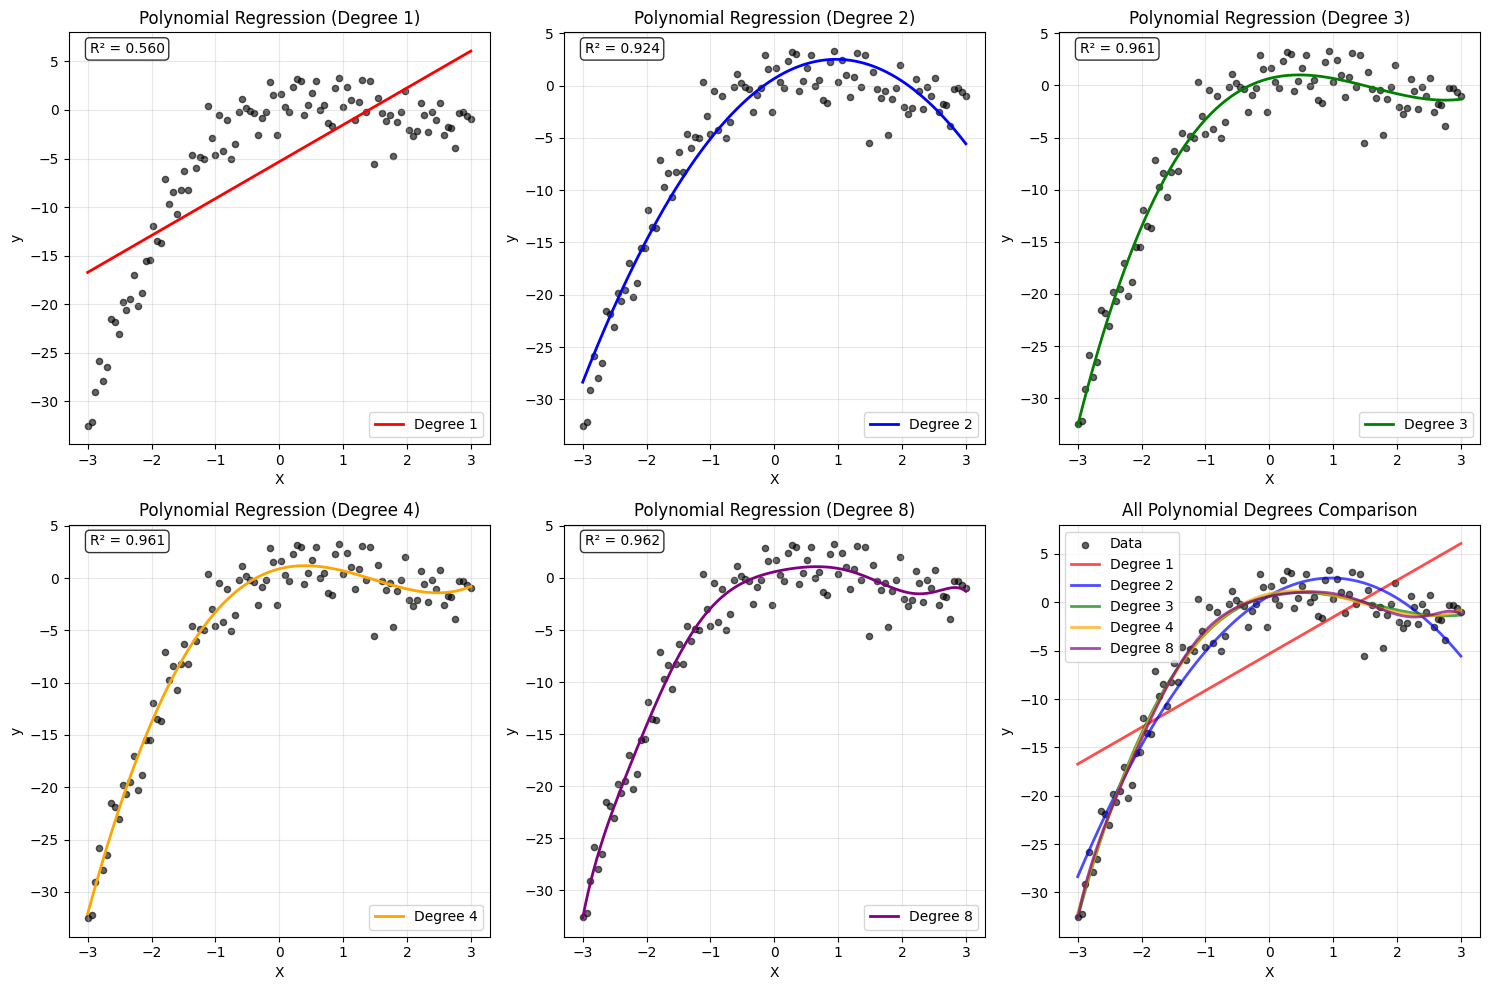

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Generate non-linear data
np.random.seed(42)
X_poly = np.linspace(-3, 3, 100).reshape(-1, 1)
y_poly = 0.5 * X_poly.ravel() ** 3 - 2 * X_poly.ravel() ** 2 + X_poly.ravel() + 1 + np.random.normal(0, 2, 100)

# Compare different polynomial degrees
degrees = [1, 2, 3, 4, 8]
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_transformed = poly_features.fit_transform(X_poly)

    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_poly_transformed, y_poly)

    # Generate smooth curve for plotting
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    X_plot_transformed = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_transformed)

    # Plot
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_poly, y_poly, alpha=0.6, color='black', s=20)
    plt.plot(X_plot, y_plot, color=colors[i], linewidth=2, label=f'Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Calculate R² score
    y_pred = model.predict(X_poly_transformed)
    r2 = r2_score(y_poly, y_pred)
    plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Comparison plot
plt.subplot(2, 3, 6)
plt.scatter(X_poly, y_poly, alpha=0.6, color='black', s=20, label='Data')
for i, degree in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_transformed = poly_features.fit_transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_transformed, y_poly)

    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    X_plot_transformed = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_transformed)

    plt.plot(X_plot, y_plot, color=colors[i], linewidth=2, label=f'Degree {degree}', alpha=0.7)

plt.xlabel('X')
plt.ylabel('y')
plt.title('All Polynomial Degrees Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Pipeline Implementation

Polynomial Regression (Degree 1):
Training R²: 0.547
Test R²: 0.582
Overfitting indicator: -0.035
Polynomial Regression (Degree 2):
Training R²: 0.918
Test R²: 0.936
Overfitting indicator: -0.018
Polynomial Regression (Degree 3):
Training R²: 0.955
Test R²: 0.976
Overfitting indicator: -0.021
Polynomial Regression (Degree 4):
Training R²: 0.956
Test R²: 0.975
Overfitting indicator: -0.018
Polynomial Regression (Degree 5):
Training R²: 0.956
Test R²: 0.974
Overfitting indicator: -0.018
Polynomial Regression (Degree 6):
Training R²: 0.956
Test R²: 0.974
Overfitting indicator: -0.018
Polynomial Regression (Degree 7):
Training R²: 0.956
Test R²: 0.974
Overfitting indicator: -0.017
Polynomial Regression (Degree 8):
Training R²: 0.957
Test R²: 0.975
Overfitting indicator: -0.018
Polynomial Regression (Degree 9):
Training R²: 0.959
Test R²: 0.970
Overfitting indicator: -0.012


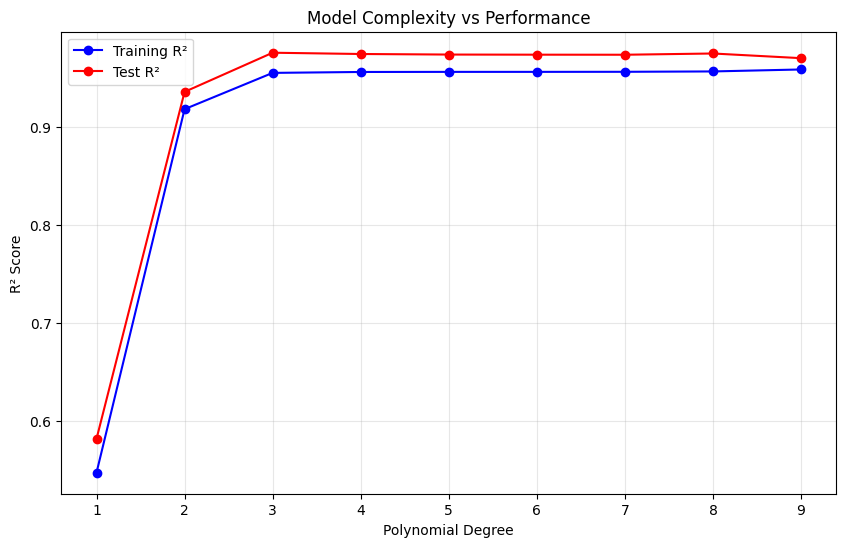

In [14]:
def polynomial_regression_pipeline(X, y, degree, test_size=0.2, random_state=42):
    """
    Complete polynomial regression pipeline
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipeline
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    # Fit pipeline
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Evaluation
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Polynomial Regression (Degree {degree}):")
    print(f"Training R²: {train_r2:.3f}")
    print(f"Test R²: {test_r2:.3f}")
    print(f"Overfitting indicator: {train_r2 - test_r2:.3f}")

    return pipeline, (train_r2, test_r2)

# Example usage
results = {}
for degree in range(1, 10):
    pipeline, scores = polynomial_regression_pipeline(X_poly, y_poly, degree)
    results[degree] = scores

# Plot bias-variance tradeoff
degrees = list(results.keys())
train_scores = [results[d][0] for d in degrees]
test_scores = [results[d][1] for d in degrees]

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', label='Training R²', color='blue')
plt.plot(degrees, test_scores, 'o-', label='Test R²', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Complexity vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Regularized Regression**


Ridge Regression (L2 Regularization)

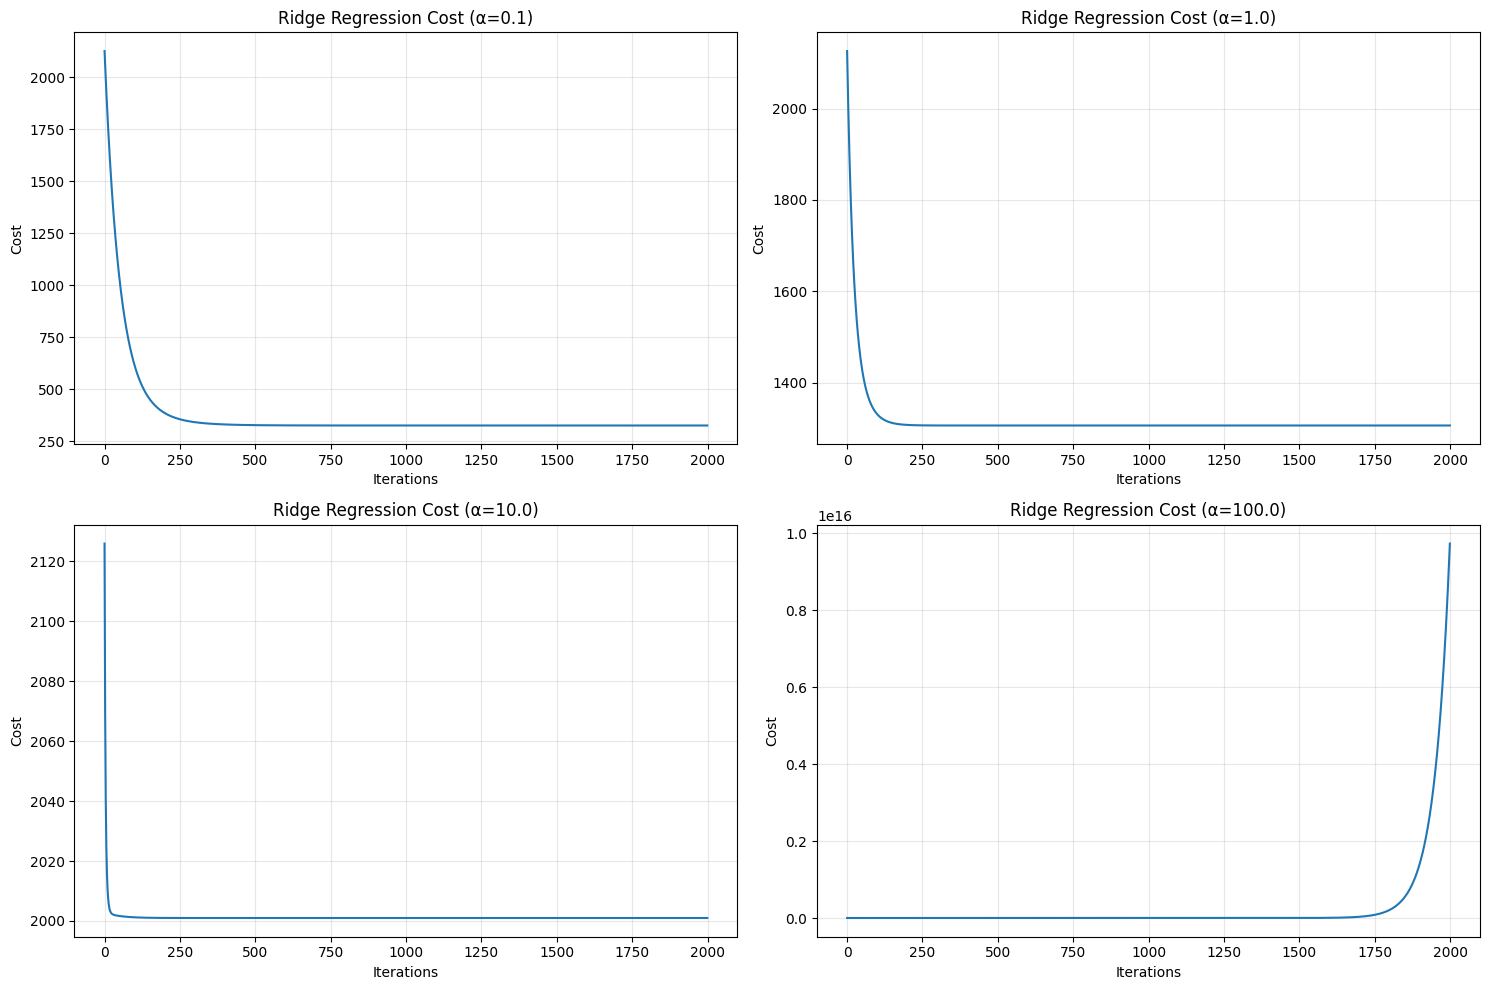


Ridge Regression Results:
Alpha = 0.1:
  Sklearn  - R²: 0.9651, MSE: 101.8887
  Scratch  - R²: 0.9131, MSE: 253.6455
  Coefficients: [40.61567238 26.92065483]

Alpha = 1.0:
  Sklearn  - R²: 0.9643, MSE: 104.1168
  Scratch  - R²: 0.4634, MSE: 1565.2772
  Coefficients: [40.34756345 26.74706492]

Alpha = 10.0:
  Sklearn  - R²: 0.9536, MSE: 135.3042
  Scratch  - R²: 0.0656, MSE: 2725.7748
  Coefficients: [37.84892601 25.12709637]

Alpha = 100.0:
  Sklearn  - R²: 0.7640, MSE: 688.4941
  Scratch  - R²: -24726474270.0482, MSE: 72131453041195.2812
  Coefficients: [23.36984501 15.65529436]



In [16]:
from sklearn.linear_model import Ridge, RidgeCV

# Ridge Regression Implementation
class RidgeRegressionScratch:
    def __init__(self, alpha=1.0, max_iterations=1000, learning_rate=0.01):
        self.alpha = alpha
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.max_iterations):
            # Forward pass
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate cost with L2 regularization
            mse = np.mean((y_pred - y) ** 2)
            l2_penalty = self.alpha * np.sum(self.weights ** 2)
            cost = mse + l2_penalty
            self.cost_history.append(cost)

            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.alpha * self.weights
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Compare Ridge with different alpha values
alphas = [0.1, 1.0, 10.0, 100.0]
ridge_results = {}

plt.figure(figsize=(15, 10))

for i, alpha in enumerate(alphas):
    # Scikit-learn Ridge
    ridge_sklearn = Ridge(alpha=alpha)
    ridge_sklearn.fit(X_train, y_train)
    y_pred_ridge = ridge_sklearn.predict(X_test)

    # From scratch Ridge
    ridge_scratch = RidgeRegressionScratch(alpha=alpha, max_iterations=2000, learning_rate=0.01)
    ridge_scratch.fit(X_train, y_train)
    y_pred_scratch = ridge_scratch.predict(X_test)

    ridge_results[alpha] = {
        'sklearn_r2': r2_score(y_test, y_pred_ridge),
        'sklearn_mse': mean_squared_error(y_test, y_pred_ridge),
        'scratch_r2': r2_score(y_test, y_pred_scratch),
        'scratch_mse': mean_squared_error(y_test, y_pred_scratch),
        'coefficients': ridge_sklearn.coef_
    }

    # Plot cost history
    plt.subplot(2, 2, i + 1)
    plt.plot(ridge_scratch.cost_history)
    plt.title(f'Ridge Regression Cost (α={alpha})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print results
print("\nRidge Regression Results:")
print("=" * 60)
for alpha in alphas:
    print(f"Alpha = {alpha}:")
    print(f"  Sklearn  - R²: {ridge_results[alpha]['sklearn_r2']:.4f}, MSE: {ridge_results[alpha]['sklearn_mse']:.4f}")
    print(f"  Scratch  - R²: {ridge_results[alpha]['scratch_r2']:.4f}, MSE: {ridge_results[alpha]['scratch_mse']:.4f}")
    print(f"  Coefficients: {ridge_results[alpha]['coefficients']}")
    print()

Lasso Regression (L1 Regularization)

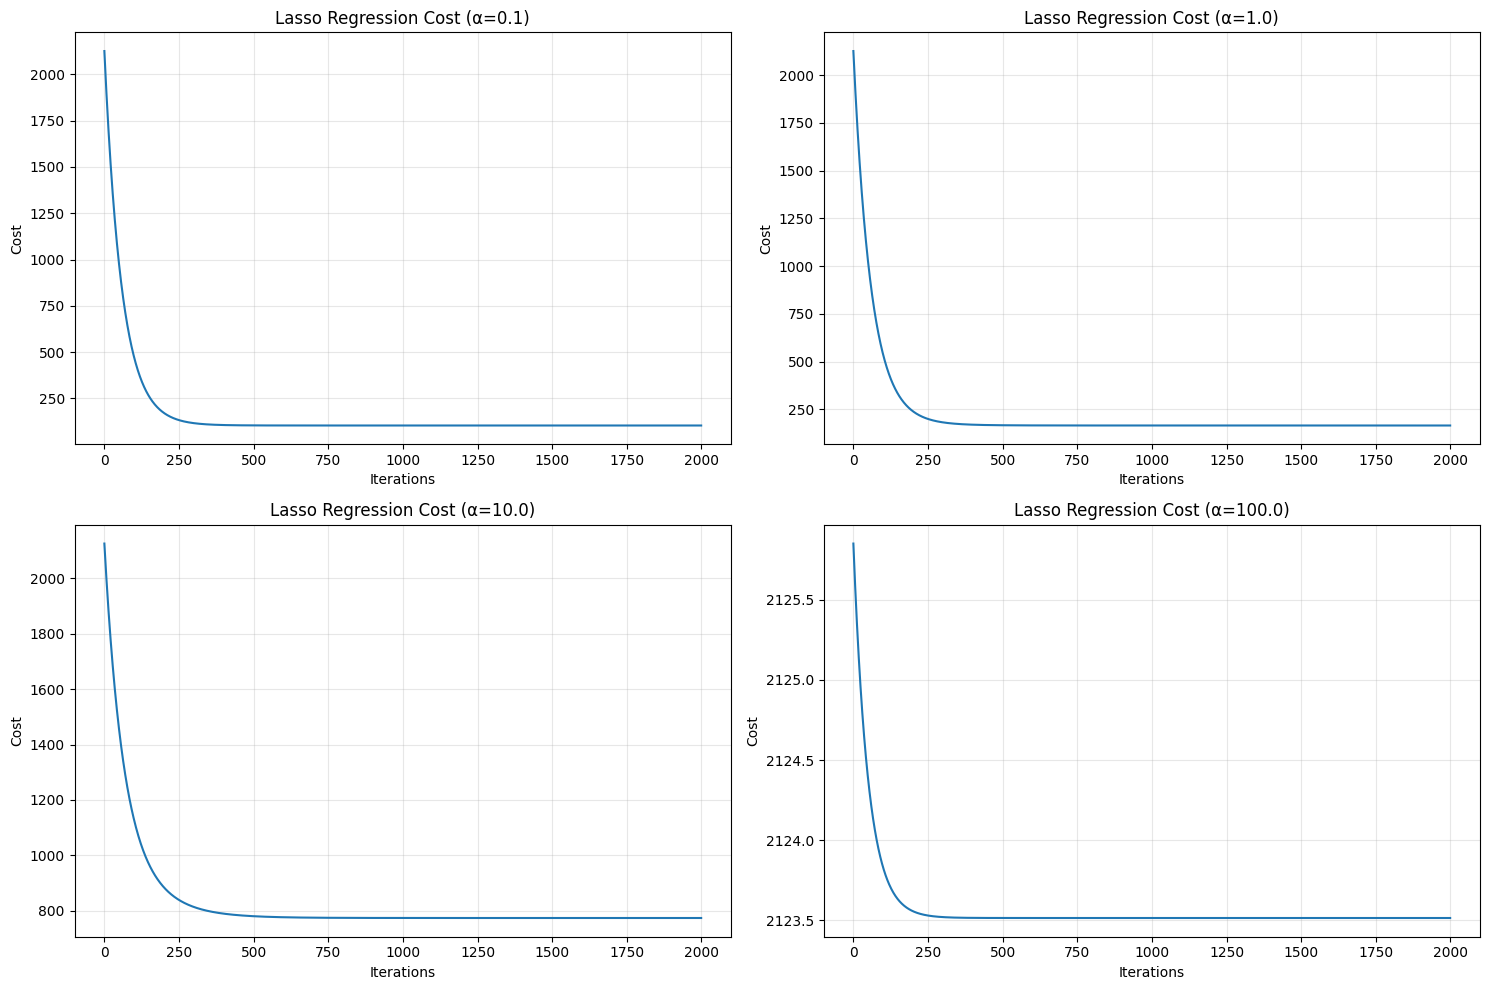


Lasso Regression Results:
Alpha = 0.1:
  Sklearn  - R²: 0.9648, MSE: 102.6751
  Scratch  - R²: 0.9648, MSE: 102.6751
  Non-zero coefficients: 2
  Coefficients: [40.5246804  26.82881507]

Alpha = 1.0:
  Sklearn  - R²: 0.9608, MSE: 114.3769
  Scratch  - R²: 0.9608, MSE: 114.3769
  Non-zero coefficients: 2
  Coefficients: [39.43566873 25.82741163]

Alpha = 10.0:
  Sklearn  - R²: 0.8358, MSE: 478.9880
  Scratch  - R²: 0.8358, MSE: 478.9881
  Non-zero coefficients: 2
  Coefficients: [28.54555205 15.81337726]

Alpha = 100.0:
  Sklearn  - R²: -0.0079, MSE: 2940.3080
  Scratch  - R²: -0.0079, MSE: 2940.3080
  Non-zero coefficients: 0
  Coefficients: [0. 0.]



In [17]:
from sklearn.linear_model import Lasso, LassoCV

# Lasso Regression Implementation
class LassoRegressionScratch:
    def __init__(self, alpha=1.0, max_iterations=1000, learning_rate=0.01):
        self.alpha = alpha
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _soft_threshold(self, x, threshold):
        """Soft thresholding function for L1 regularization"""
        return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.max_iterations):
            # Forward pass
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate cost with L1 regularization
            mse = np.mean((y_pred - y) ** 2)
            l1_penalty = self.alpha * np.sum(np.abs(self.weights))
            cost = mse + l1_penalty
            self.cost_history.append(cost)

            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update parameters with soft thresholding
            self.weights = self._soft_threshold(
                self.weights - self.learning_rate * dw,
                self.learning_rate * self.alpha
            )
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Compare Lasso with different alpha values
lasso_results = {}

plt.figure(figsize=(15, 10))

for i, alpha in enumerate(alphas):
    # Scikit-learn Lasso
    lasso_sklearn = Lasso(alpha=alpha, max_iter=2000)
    lasso_sklearn.fit(X_train, y_train)
    y_pred_lasso = lasso_sklearn.predict(X_test)

    # From scratch Lasso
    lasso_scratch = LassoRegressionScratch(alpha=alpha, max_iterations=2000, learning_rate=0.01)
    lasso_scratch.fit(X_train, y_train)
    y_pred_scratch = lasso_scratch.predict(X_test)

    lasso_results[alpha] = {
        'sklearn_r2': r2_score(y_test, y_pred_lasso),
        'sklearn_mse': mean_squared_error(y_test, y_pred_lasso),
        'scratch_r2': r2_score(y_test, y_pred_scratch),
        'scratch_mse': mean_squared_error(y_test, y_pred_scratch),
        'coefficients': lasso_sklearn.coef_,
        'non_zero_coefs': np.sum(lasso_sklearn.coef_ != 0)
    }

    # Plot cost history
    plt.subplot(2, 2, i + 1)
    plt.plot(lasso_scratch.cost_history)
    plt.title(f'Lasso Regression Cost (α={alpha})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print results
print("\nLasso Regression Results:")
print("=" * 60)
for alpha in alphas:
    print(f"Alpha = {alpha}:")
    print(f"  Sklearn  - R²: {lasso_results[alpha]['sklearn_r2']:.4f}, MSE: {lasso_results[alpha]['sklearn_mse']:.4f}")
    print(f"  Scratch  - R²: {lasso_results[alpha]['scratch_r2']:.4f}, MSE: {lasso_results[alpha]['scratch_mse']:.4f}")
    print(f"  Non-zero coefficients: {lasso_results[alpha]['non_zero_coefs']}")
    print(f"  Coefficients: {lasso_results[alpha]['coefficients']}")
    print()

Elastic Net Regression

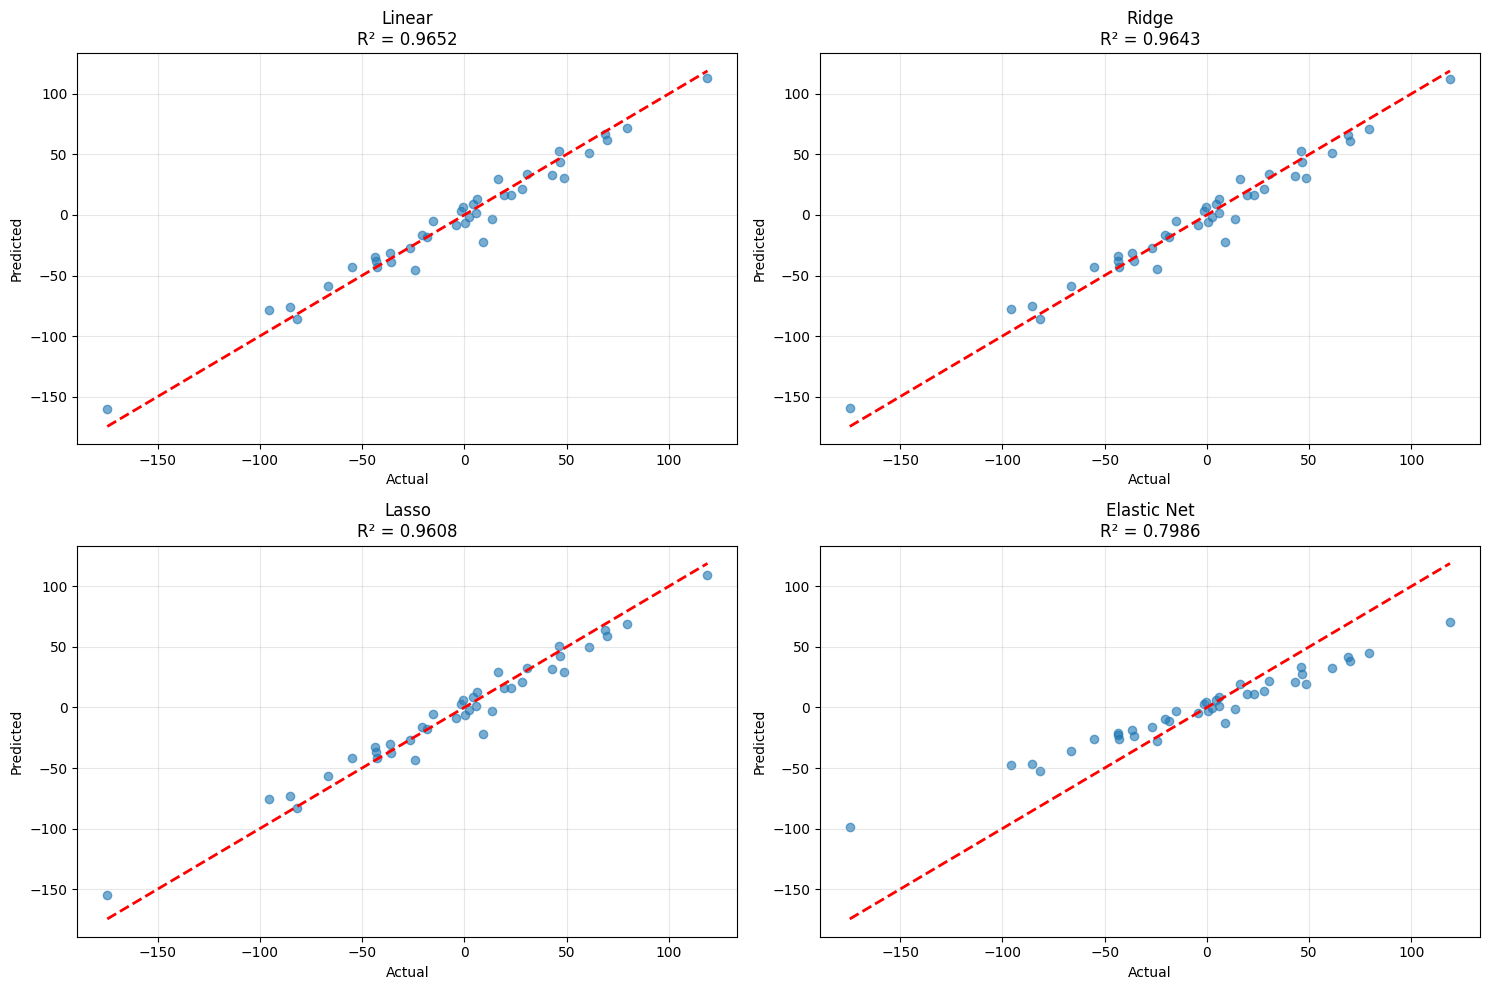


Regularization Methods Comparison:
Linear:
  R² Score: 0.9652
  MSE: 101.6528
  Coefficients: [40.64568213 26.94008215]

Ridge:
  R² Score: 0.9643
  MSE: 104.1168
  Coefficients: [40.34756345 26.74706492]

Lasso:
  R² Score: 0.9608
  MSE: 114.3769
  Coefficients: [39.43566873 25.82741163]

Elastic Net:
  R² Score: 0.7986
  MSE: 587.5588
  Coefficients: [25.16415737 16.72890069]



In [18]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

# Elastic Net Implementation
def compare_regularization_methods(X_train, X_test, y_train, y_test):
    """
    Compare different regularization methods
    """
    methods = {
        'Linear': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0),
        'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5)
    }

    results = {}

    plt.figure(figsize=(15, 10))

    for i, (name, model) in enumerate(methods.items()):
        # Fit model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            'r2': r2,
            'mse': mse,
            'coefficients': model.coef_ if hasattr(model, 'coef_') else None
        }

        # Plot actual vs predicted
        plt.subplot(2, 2, i + 1)
        plt.scatter(y_test, y_pred, alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{name}\nR² = {r2:.4f}')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results

# Compare all methods
comparison_results = compare_regularization_methods(X_train, X_test, y_train, y_test)

print("\nRegularization Methods Comparison:")
print("=" * 50)
for method, metrics in comparison_results.items():
    print(f"{method}:")
    print(f"  R² Score: {metrics['r2']:.4f}")
    print(f"  MSE: {metrics['mse']:.4f}")
    if metrics['coefficients'] is not None:
        print(f"  Coefficients: {metrics['coefficients']}")
    print()

Bias-Variance Trade-Off (Conceptual Code Example)

--- High Bias Model (Linear Regression) ---
Train MSE: 0.1741
Test MSE: 0.2223

--- High Variance Model (Decision Tree - No Depth Limit) ---
Train MSE: 0.0000
Test MSE: 0.0191

--- Balanced Model (Polynomial Regression - Degree 3) ---
Train MSE: 0.0110
Test MSE: 0.0116


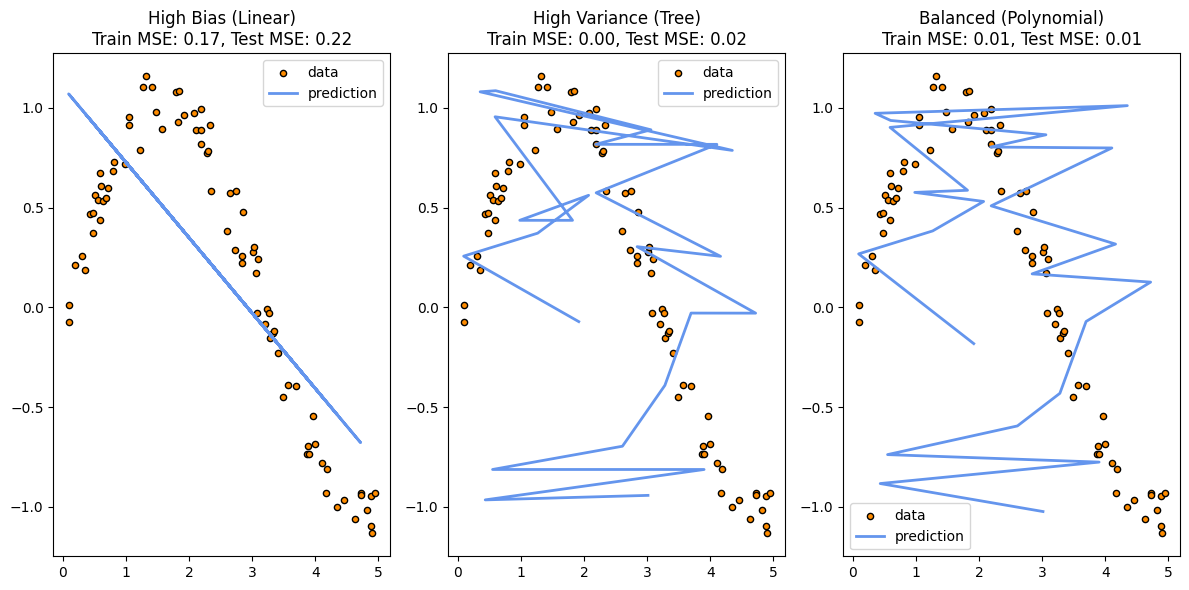

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Illustrate High Bias (Underfitting - Simple Model)
# A simple linear model will likely underfit a non-linear relationship.
model_high_bias = LinearRegression()
model_high_bias.fit(X_train, y_train)
y_train_pred_hb = model_high_bias.predict(X_train)
y_test_pred_hb = model_high_bias.predict(X_test)

train_mse_hb = mean_squared_error(y_train, y_train_pred_hb)
test_mse_hb = mean_squared_error(y_test, y_test_pred_hb)

print("--- High Bias Model (Linear Regression) ---")
print(f"Train MSE: {train_mse_hb:.4f}")
print(f"Test MSE: {test_mse_hb:.4f}")

# 3. Illustrate High Variance (Overfitting - Complex Model)
# A deep decision tree without constraints will likely overfit.
model_high_variance = DecisionTreeRegressor(max_depth=None, random_state=42) # No depth limit
model_high_variance.fit(X_train, y_train)
y_train_pred_hv = model_high_variance.predict(X_train)
y_test_pred_hv = model_high_variance.predict(X_test)

train_mse_hv = mean_squared_error(y_train, y_train_pred_hv)
test_mse_hv = mean_squared_error(y_test, y_test_pred_hv)

print("\n--- High Variance Model (Decision Tree - No Depth Limit) ---")
print(f"Train MSE: {train_mse_hv:.4f}")
print(f"Test MSE: {test_mse_hv:.4f}")

# 4. Illustrate Balanced Trade-off (More Optimal Model)
# A polynomial regression or a constrained decision tree.
# Using PolynomialFeatures to introduce non-linearity but not too much.
model_balanced = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_balanced.fit(X_train, y_train)
y_train_pred_bal = model_balanced.predict(X_train)
y_test_pred_bal = model_balanced.predict(X_test)

train_mse_bal = mean_squared_error(y_train, y_train_pred_bal)
test_mse_bal = mean_squared_error(y_test, y_test_pred_bal)

print("\n--- Balanced Model (Polynomial Regression - Degree 3) ---")
print(f"Train MSE: {train_mse_bal:.4f}")
print(f"Test MSE: {test_mse_bal:.4f}")

# Plotting the results to visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_test_pred_hb, color="cornflowerblue", linewidth=2, label="prediction")
plt.title(f"High Bias (Linear)\nTrain MSE: {train_mse_hb:.2f}, Test MSE: {test_mse_hb:.2f}")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_test_pred_hv[np.argsort(X_test.flatten())], color="cornflowerblue", linewidth=2, label="prediction")
plt.title(f"High Variance (Tree)\nTrain MSE: {train_mse_hv:.2f}, Test MSE: {test_mse_hv:.2f}")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_test_pred_bal[np.argsort(X_test.flatten())], color="cornflowerblue", linewidth=2, label="prediction")
plt.title(f"Balanced (Polynomial)\nTrain MSE: {train_mse_bal:.2f}, Test MSE: {test_mse_bal:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

Regression Techniques - General Structure for Prediction Projects

General Structure for Prediction Projects

--- Dummy Dataset Loaded for Demonstration ---

Numerical Features: ['Feature1', 'Feature2']
Categorical Features: ['Feature3_Cat']

--- Training Linear Regression ---
Mean Squared Error (MSE): 3665.8948
Root Mean Squared Error (RMSE): 60.5466
R-squared (R2): -0.7371

--- Training Ridge Regression ---
Mean Squared Error (MSE): 3643.3529
Root Mean Squared Error (RMSE): 60.3602
R-squared (R2): -0.7265

--- Training Lasso Regression ---
Mean Squared Error (MSE): 3651.9058
Root Mean Squared Error (RMSE): 60.4310
R-squared (R2): -0.7305

--- Training Random Forest Regressor ---
Mean Squared Error (MSE): 4630.7481
Root Mean Squared Error (RMSE): 68.0496
R-squared (R2): -1.1944

--- Training Gradient Boosting Regressor ---
Mean Squared Error (MSE): 7557.1289
Root Mean Squared Error (RMSE): 86.9317
R-squared (R2): -2.5811

--- Summary of Model Performance ---
Linear Regression: MSE=3665.8948, RMSE=60.5466, R2=-0.7371
Ridge Regression: MSE=3643.3529, RMSE=60.3602, R2=-0.7265
Lasso Regression: M

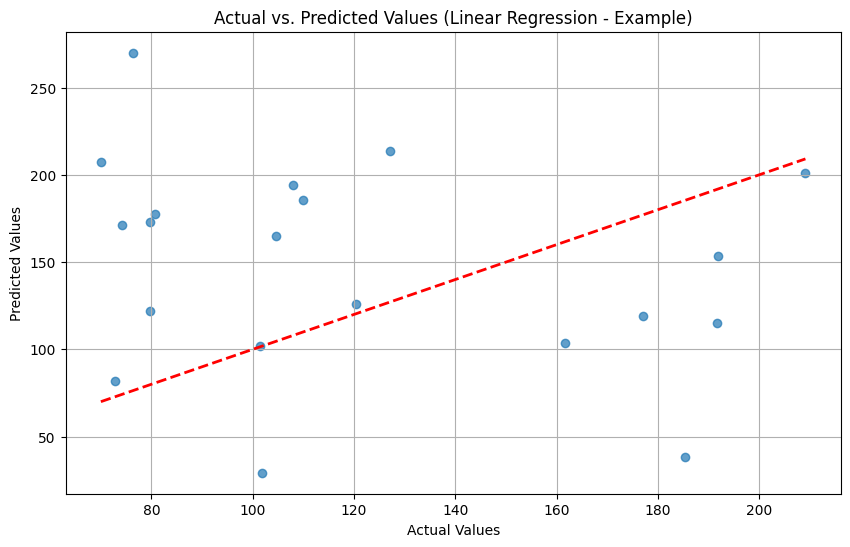

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration for a specific project ---
# You would uncomment and modify one of these blocks based on your project

# # Project 1: Boston House Prices (using scikit-learn's toy dataset as an example)
# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
# df['PRICE'] = boston.target
# target_column = 'PRICE'
# features = boston.feature_names.tolist() # All features are numerical
# print("--- Boston House Prices Dataset Loaded (Example) ---")


# Project 2: USA Housing Prediction (Hypothetical - requires a dataset)
# Assume 'USA_Housing.csv' has columns like 'Avg. Area Income', 'Avg. Area House Age', etc., and 'Price'
# df = pd.read_csv('USA_Housing.csv')
# target_column = 'Price'
# features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
#             'Avg. Area Number of Bedrooms', 'Area Population']
# # Example of creating a categorical feature for demonstration
# # df['State'] = np.random.choice(['CA', 'NY', 'TX', 'FL'], size=len(df))
# print("--- USA Housing Prediction Dataset Loaded (Hypothetical) ---")


# Project 3: New York City Taxi Fare Prediction (Hypothetical - requires a dataset)
# Assume 'nyc_taxi_fares.csv' has columns like 'pickup_latitude', 'dropoff_longitude', 'passenger_count', 'fare_amount'
# df = pd.read_csv('nyc_taxi_fares.csv')
# target_column = 'fare_amount'
# features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
#             'dropoff_longitude', 'passenger_count']
# # Example of feature engineering for time-based features
# # df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
# # df['hour'] = df['pickup_datetime'].dt.hour
# # df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
# # features.extend(['hour', 'day_of_week'])
# print("--- NYC Taxi Fare Prediction Dataset Loaded (Hypothetical) ---")


# Placeholder for a generic dataset (replace with actual data loading for your project)
# For demonstration purposes, let's create a dummy dataset if no specific one is uncommented above
if 'df' not in locals():
    data = {
        'Feature1': np.random.rand(100) * 100,
        'Feature2': np.random.rand(100) * 50,
        'Feature3_Cat': np.random.choice(['A', 'B', 'C'], 100),
        'Target': np.random.rand(100) * 200 + 50 # Our target variable
    }
    df = pd.DataFrame(data)
    target_column = 'Target'
    features = ['Feature1', 'Feature2', 'Feature3_Cat']
    print("--- Dummy Dataset Loaded for Demonstration ---")


# Separate target variable from features
X = df[features]
y = df[target_column]

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Selection and Training ---

# Define different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Create a full pipeline that includes preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    print(f"\n--- Training {name} ---")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

print("\n--- Summary of Model Performance ---")
for name, metrics in results.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, RMSE={metrics['RMSE']:.4f}, R2={metrics['R2']:.4f}")

# --- Optional: Visualize Predictions vs. Actual (for one model) ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values ({list(models.keys())[0]} - Example)")
plt.grid(True)
plt.show()

# --- Optional: Feature Importance (for tree-based models) ---
# If using RandomForestRegressor or GradientBoostingRegressor
if 'Random Forest Regressor' in models and pipeline.named_steps['regressor'].__class__.__name__ == 'RandomForestRegressor':
    rf_model = pipeline.named_steps['regressor']
    # Get feature names after one-hot encoding
    if 'onehot' in preprocessor.named_transformers_['cat'].named_steps:
        ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    else: # In case of no categorical features
        ohe_feature_names = []

    all_feature_names = numerical_features + list(ohe_feature_names)

    importances = rf_model.feature_importances_

    # Create a DataFrame for better visualization
    feature_importances_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(15))
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

Emergency 911 Calls - Conceptual Code Outline

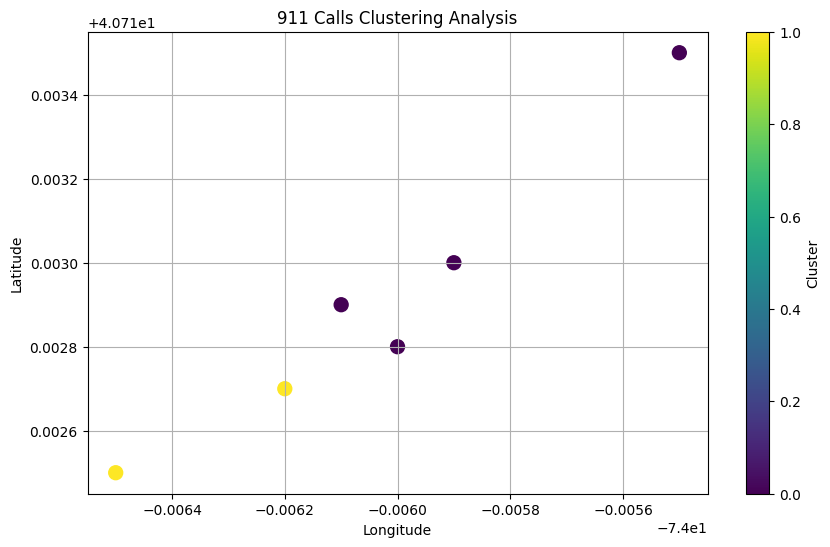

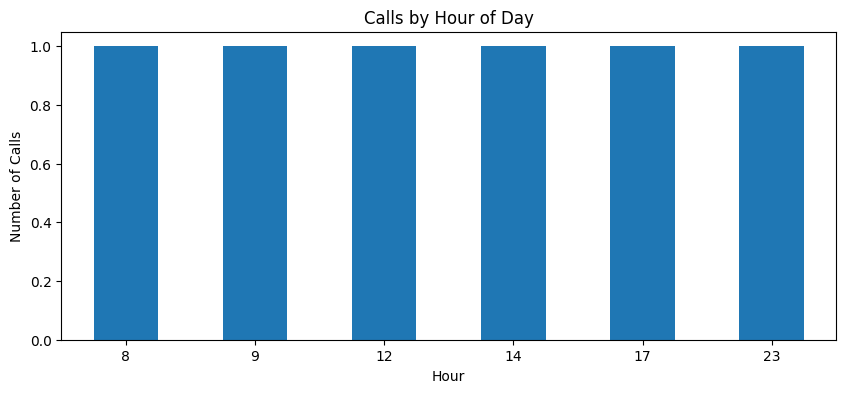

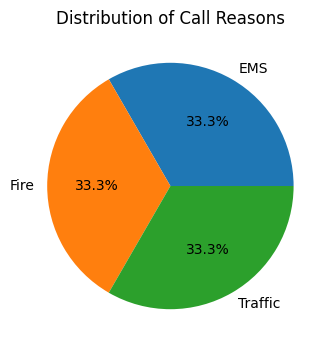


Call Statistics:
Total calls: 6
Time period: 2023-01-01 09:15:00 to 2023-01-03 12:30:00

Calls by reason:
reason
EMS        2
Fire       2
Traffic    2
Name: count, dtype: int64


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime

# Sample 911 data with proper formatting
data = {
    'lat': [40.7128, 40.7129, 40.7130, 40.7127, 40.7135, 40.7125],
    'lng': [-74.0060, -74.0061, -74.0059, -74.0062, -74.0055, -74.0065],
    'time': ['2023-01-01 14:30:00', '2023-01-01 09:15:00',
             '2023-01-02 23:45:00', '2023-01-02 17:20:00',
             '2023-01-03 08:10:00', '2023-01-03 12:30:00'],
    'reason': ['EMS', 'Fire', 'Traffic', 'EMS', 'Fire', 'Traffic']
}
df = pd.DataFrame(data)

# Convert time to datetime and extract features
df['datetime'] = pd.to_datetime(df['time'])
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['datetime'].dt.month

# Cluster analysis with proper data scaling
from sklearn.preprocessing import StandardScaler

# Prepare coordinates for clustering
coords = df[['lat', 'lng']]

# Scale the data
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Determine optimal clusters using elbow method (optional)
# distortions = []
# K = range(1,5)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(coords_scaled)
#     distortions.append(kmeanModel.inertia_)

# Perform clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(coords_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['lng'], df['lat'], c=df['cluster'], cmap='viridis', s=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('911 Calls Clustering Analysis')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Time-based analysis
plt.figure(figsize=(10, 4))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Calls by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.xticks(rotation=0)
plt.show()

# Reason analysis
reason_counts = df['reason'].value_counts()
plt.figure(figsize=(8, 4))
reason_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Call Reasons')
plt.ylabel('')
plt.show()

# Print summary statistics
print("\nCall Statistics:")
print(f"Total calls: {len(df)}")
print(f"Time period: {df['datetime'].min()} to {df['datetime'].max()}")
print("\nCalls by reason:")
print(reason_counts)


NYC Taxi Fare Prediction (Updated)

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import radians, sin, cos, sqrt, atan2

# Sample taxi data with more realistic values
data = {
    'pickup_longitude': [-73.9857, -73.9881, -73.9915, -73.9823],
    'pickup_latitude': [40.7484, 40.7502, 40.7536, 40.7518],
    'dropoff_longitude': [-73.9801, -73.9785, -73.9749, -73.9862],
    'dropoff_latitude': [40.7521, 40.7553, 40.7587, 40.7495],
    'passenger_count': [1, 2, 1, 3],
    'fare_amount': [12.50, 14.00, 15.50, 13.00]
}
df = pd.DataFrame(data)

# Haversine distance calculation (accurate implementation)
def haversine_distance(row):
    lat1, lon1 = radians(row['pickup_latitude']), radians(row['pickup_longitude'])
    lat2, lon2 = radians(row['dropoff_latitude']), radians(row['dropoff_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c * 0.621371  # Convert km to miles

    return distance

df['distance'] = df.apply(haversine_distance, axis=1)

# Features and target
X = df[['distance', 'passenger_count']]
y = df['fare_amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: ${rmse:.2f}")

# Predict new fare
new_ride = pd.DataFrame({
    'distance': [2.5],  # in miles
    'passenger_count': [2]
})
predicted_fare = model.predict(new_ride)
print(f"\nPredicted Fare for 2.5 mile trip with 2 passengers: ${predicted_fare[0]:.2f}")

Root Mean Squared Error: $0.63

Predicted Fare for 2.5 mile trip with 2 passengers: $14.51


E-commerce Project (Mobile vs. Website)

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Simulated e-commerce data
data = {
    'time_on_app': [12, 15, 8, 20, 5, 25, 18, 10, 30, 7],
    'time_on_website': [5, 8, 12, 3, 15, 2, 6, 10, 1, 13],
    'mobile_visits': [8, 10, 5, 12, 3, 15, 9, 6, 18, 4],
    'desktop_visits': [2, 1, 3, 1, 4, 0, 2, 3, 0, 5],
    'yearly_amount': [400, 500, 350, 600, 300, 700, 550, 450, 800, 380]
}
df = pd.DataFrame(data)

X = df[['time_on_app', 'time_on_website', 'mobile_visits', 'desktop_visits']]
y = df['yearly_amount']

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance for Yearly Spending:")
print(importance)

# Recommendations
print("\nRecommendations for Antara's E-commerce Platform:")
print("1. Focus on improving mobile app experience (most important feature)")
print("2. Optimize website for users who spend more time there")
print("3. Encourage more mobile visits as they correlate with higher spending")

Feature Importance for Yearly Spending:
           Feature  Importance
0      time_on_app    0.344626
2    mobile_visits    0.283874
1  time_on_website    0.258413
3   desktop_visits    0.113087

Recommendations for Antara's E-commerce Platform:
1. Focus on improving mobile app experience (most important feature)
2. Optimize website for users who spend more time there
3. Encourage more mobile visits as they correlate with higher spending


USA Housing Prediction

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Simulated housing data
data = {
    'Avg_Area_Income': [65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000],
    'Avg_Area_House_Age': [5, 6, 7, 8, 9, 10, 11, 12],
    'Avg_Area_Number_Rooms': [6, 7, 8, 9, 10, 11, 12, 13],
    'Area_Population': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000],
    'Price': [350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000]
}
df = pd.DataFrame(data)

X = df.drop('Price', axis=1)
y = df['Price']

# Create pipeline with scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit model
pipeline.fit(X, y)

# Predict a new house
new_house = [[72000, 6.5, 7.5, 65000]]
predicted_price = pipeline.predict(new_house)

print(f"Aditya's predicted house price: ${predicted_price[0]:,.2f}")

# Feature importance
coefficients = pipeline.named_steps['regressor'].coef_
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance for Housing Price:")
print(importance)

Aditya's predicted house price: $423,750.00

Feature Importance for Housing Price:
                 Feature   Coefficient
1     Avg_Area_House_Age  28641.098093
2  Avg_Area_Number_Rooms  28641.098093
0        Avg_Area_Income  28641.098093
3        Area_Population  28641.098093


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


E-commerce Project (Mobile vs. Website)

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Simulated e-commerce data
data = {
    'time_on_app': [12, 15, 8, 20, 5, 25, 18, 10, 30, 7],
    'time_on_website': [5, 8, 12, 3, 15, 2, 6, 10, 1, 13],
    'mobile_visits': [8, 10, 5, 12, 3, 15, 9, 6, 18, 4],
    'desktop_visits': [2, 1, 3, 1, 4, 0, 2, 3, 0, 5],
    'yearly_amount': [400, 500, 350, 600, 300, 700, 550, 450, 800, 380]
}
df = pd.DataFrame(data)

X = df[['time_on_app', 'time_on_website', 'mobile_visits', 'desktop_visits']]
y = df['yearly_amount']

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance for Yearly Spending:")
print(importance)

# Recommendations
print("\nRecommendations for Antara's E-commerce Platform:")
print("1. Focus on improving mobile app experience (most important feature)")
print("2. Optimize website for users who spend more time there")
print("3. Encourage more mobile visits as they correlate with higher spending")

Feature Importance for Yearly Spending:
           Feature  Importance
0      time_on_app    0.344626
2    mobile_visits    0.283874
1  time_on_website    0.258413
3   desktop_visits    0.113087

Recommendations for Antara's E-commerce Platform:
1. Focus on improving mobile app experience (most important feature)
2. Optimize website for users who spend more time there
3. Encourage more mobile visits as they correlate with higher spending


USA Housing Prediction

Model Performance:
Mean Squared Error: 57000056.10
Root Mean Squared Error: 7549.84
R-squared: 0.94

Feature Importance:
            Feature   Coefficient
4  Distance_to_City -17293.158406
1        Population  17102.234030
3     School_Rating  10786.432655
0     Median_Income  -6938.636377
2        Crime_Rate  -2669.056148


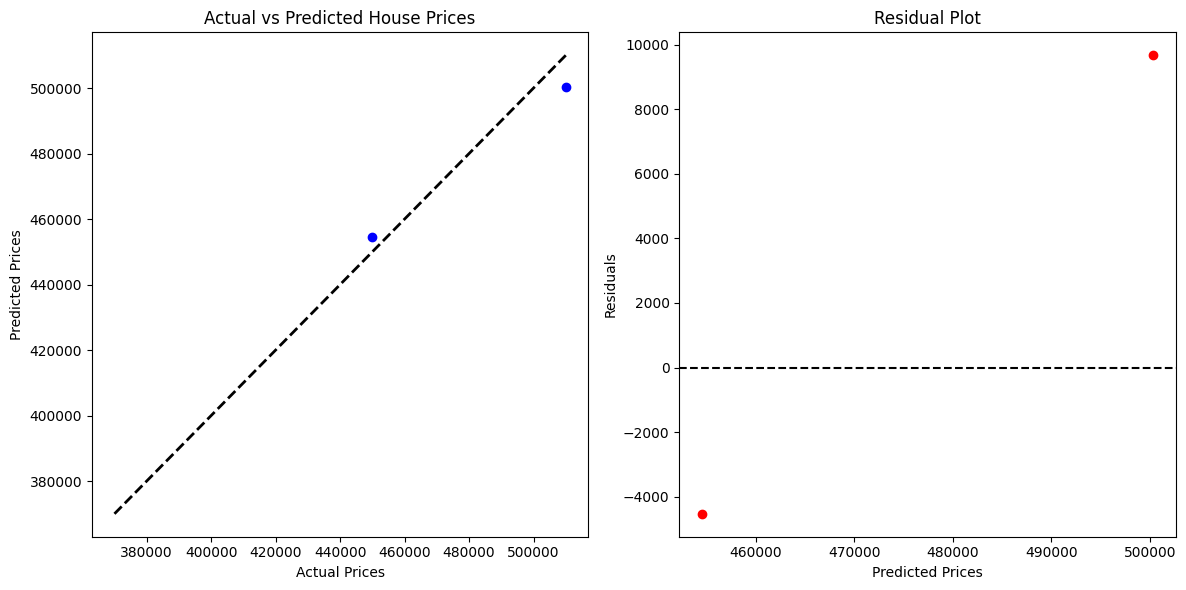


Predicted price for new house: $423,099.42


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Simulated 2025 housing data based on current market trends :cite[2]:cite[7]
data = {
    'Median_Income': [75000, 82000, 68000, 91000, 79000, 85000, 72000, 88000, 95000, 77000],
    'Population': [50000, 60000, 45000, 70000, 55000, 65000, 48000, 72000, 80000, 52000],
    'Crime_Rate': [2.5, 1.8, 3.2, 1.5, 2.1, 1.9, 3.0, 1.7, 1.3, 2.8],
    'School_Rating': [8, 9, 7, 10, 8, 9, 6, 9, 10, 7],
    'Distance_to_City': [15, 10, 25, 8, 20, 12, 30, 9, 5, 22],
    'House_Price': [422800, 450000, 380000, 480000, 410000, 460000, 370000, 470000, 510000, 390000]
}

df = pd.DataFrame(data)

# Feature engineering
df['Price_per_Sqft'] = df['House_Price'] / 1500  # Assuming average 1500 sqft homes
df['Income_to_Price_Ratio'] = df['Median_Income'] / df['House_Price']

# Prepare data
X = df[['Median_Income', 'Population', 'Crime_Rate', 'School_Rating', 'Distance_to_City']]
y = df['House_Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(importance)

# Visualization
plt.figure(figsize=(12, 6))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Predict a new house
new_house = [[80000, 58000, 2.3, 8, 18]]  # Median_Income, Population, Crime_Rate, School_Rating, Distance_to_City
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)

print(f"\nPredicted price for new house: ${predicted_price[0]:,.2f}")